<a href="https://colab.research.google.com/github/ad709kr/capstone_projects-EDA-on-Telecom-churn-analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
file_path = '/content/drive/MyDrive/Almabetter/capstone_project-1/Telecom Churn.csv'

In [32]:
data = pd.read_csv(file_path)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
print("data has",data.shape[0]," rows and ", data.shape[1], "columns")
print("-"*50)
print(data.info())

data has 3333  rows and  20 columns
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total 

Churn column is the target variable which of boolean type. Apart from that, 3 object type features, 8 float and 8 int type features are present in the dataset.

lets checks the null values in datasets.

In [34]:
data.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

from above it can be seen that there is no null values in the dataset.

1) Lets find out the churn rate of the company.

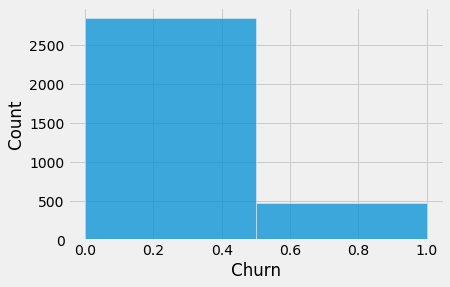

In [35]:
sns.histplot(data=data,x=data['Churn'],bins=2,fill=True,element='bars')

In [36]:
print("The churn for the company is :", data['Churn'].value_counts()[1]*100/data.shape[0],"%")

The churn for the company is : 14.491449144914492 %


2)lets find out the relationship between the catogrical features and the churn rate. Identify which catogory has maximum churn value?

out of 3 object features, lets find out how many of them are of categorical type and how the churn is related to the catogorical features?

In [37]:
## out of object how many of the catogorical features and unique cotegory
print(data['State'].unique())
print('Total number of unique states are',data['State'].unique().shape[0])
print("*"*50)
print(data['International plan'].unique())
print("*"*50)
print(data['Voice mail plan'].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Total number of unique states are 51
**************************************************
['No' 'Yes']
**************************************************
['Yes' 'No']


All 3 object features are of catogorical type
<br> - States have 51 unique states name
<br> - International plan - catogorical feature of 2 catogory, either customer has activated international plan or not.
<br> - Voice mail plan - catogorical feature of 2 catogory, either customer has activated Voice maill plan or not 

Lets find out that is there any catogorical feature in integer dataset.

In [38]:
print(data['Area code'].unique())
print("*"*50)
print("Total unique values in Account length feature is : ",len(data['Account length'].unique()))

[415 408 510]
**************************************************
Total unique values in Account length feature is :  212


In [43]:
def histogram_for_pop(df,hue=None):
  plt.style.use("fivethirtyeight")
  plt.figure(figsize= (20,22))
  color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
  for i,col in enumerate(df.columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(8,3, i+1)
    sns.countplot(data=df,x=df[col], hue= hue,color = rand_col, fill = rand_col)
    plt.title(col, color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()
def count_cat_feature(df,col):
  df1 = df[col].value_counts().reset_index()
  return df1.rename(columns={df1.columns[0]:col,df1.columns[1]:"count"})


   Area code  count
0        415   1655
1        510    840
2        408    838
--------------------------------------------------
  International plan  count
0                 No   3010
1                Yes    323
--------------------------------------------------
  Voice mail plan  count
0              No   2411
1             Yes    922


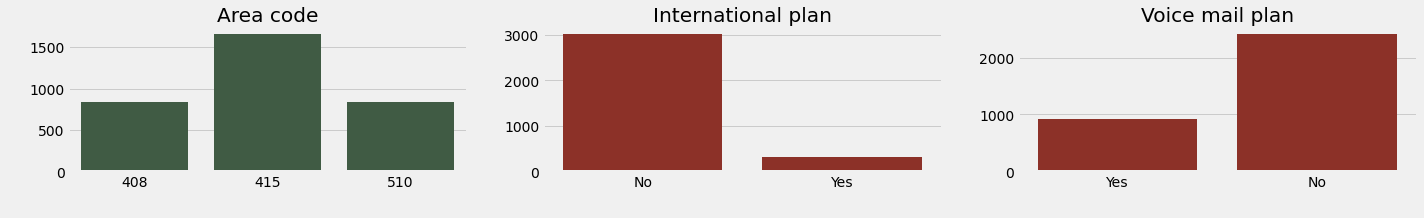

In [44]:
df_cat = data[['Area code', 'International plan','Voice mail plan']]
histogram_for_pop(df_cat)

Area_code_df = count_cat_feature(df_cat,col="Area code")
int_plan_df = count_cat_feature(df_cat,col="International plan")
v_m_p_df = count_cat_feature(df_cat,col="Voice mail plan")

print(Area_code_df)
print("-"*50)
print(int_plan_df)
print("-"*50)
print(v_m_p_df)



##print("-"*100)
##print(data["International plan"].value_counts())
#print("-"*100)
#print(data["Voice mail plan"].value_counts())


The above analysis is done for all the customer present.

Lets try and identify the churn values for different catogorical feature.

   Area code  count
0        415    236
1        510    125
2        408    122
--------------------------------------------------
  International plan  count
0                 No    346
1                Yes    137
--------------------------------------------------
  Voice mail plan  count
0              No    403
1             Yes     80


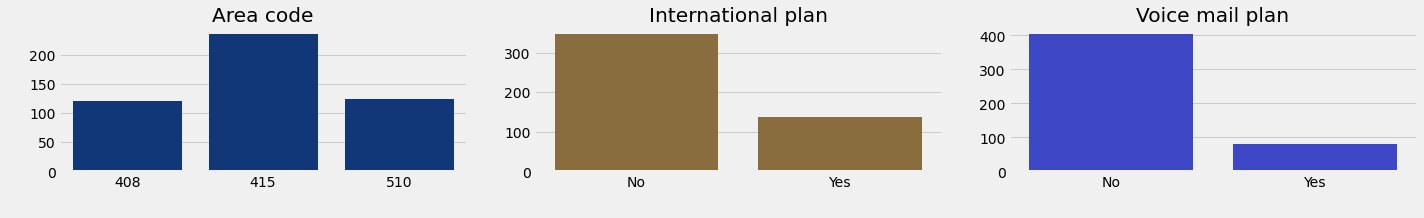

In [45]:
data_churn = data[data['Churn']==True]
data_churn_count = data_churn[['Area code', 'International plan','Voice mail plan']]

histogram_for_pop(data_churn_count)

Area_code_churn = count_cat_feature(data_churn_count,col="Area code")
int_plan_churn = count_cat_feature(data_churn_count,col="International plan")
v_m_p_churn = count_cat_feature(data_churn_count,col="Voice mail plan")

print(Area_code_churn)
print("-"*50)
print(int_plan_churn)
print("-"*50)
print(v_m_p_churn)


In [52]:
# lets calculate churn rate for each cotegory
def churn_rate(total_df,churn_df):
  return churn_df['count']/total_df['count']

Area_code_churn['churn rate'] = churn_rate(Area_code_df,Area_code_churn)
int_plan_churn['churn rate'] = churn_rate(int_plan_df,int_plan_churn)
v_m_p_churn['churn rate'] = churn_rate(v_m_p_df,v_m_p_churn)

In [54]:
print(Area_code_churn)
print("-"*50)
print(int_plan_churn)
print("-"*50)
print(v_m_p_churn)

   Area code  count  churn rate
0        415    236    0.142598
1        510    125    0.148810
2        408    122    0.145585
--------------------------------------------------
  International plan  count  churn rate
0                 No    346    0.114950
1                Yes    137    0.424149
--------------------------------------------------
  Voice mail plan  count  churn rate
0              No    403    0.167151
1             Yes     80    0.086768


since the states value having the total 51 unique values, Lets plot them seperately and calculate the maximum chrun rate

In [58]:
# for state catogory
state_pop = count_cat_feature(data,col="State")
state_churn = count_cat_feature(data_churn,col="State")
state_churn['churn rate'] = churn_rate(state_pop,state_churn)

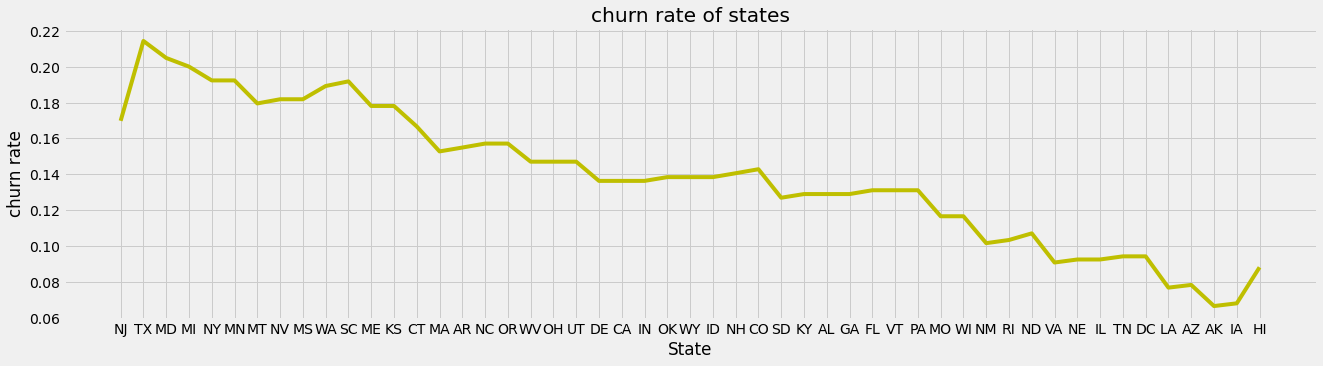

In [74]:
plt.figure(figsize=(20,5))
plt.plot(state_churn['State'],state_churn['churn rate'],"y")
plt.xlabel("State")
plt.ylabel("churn rate")
plt.title("churn rate of states")
plt.show()

In [75]:
print("maximum person belongs to state:",state_pop['State'][state_pop['count']== max(state_pop['count'])])
print("-"*50)
print("maximum person churns belongs to state:",state_churn['State'][state_pop['count']== max(state_pop['count'])])
print("-"*50)
print("maximum churn rate state:",state_churn['State'][state_churn['churn rate']== max(state_churn['churn rate'])])

maximum person belongs to state: 0    WV
Name: State, dtype: object
--------------------------------------------------
maximum person churns belongs to state: 0    NJ
Name: State, dtype: object
--------------------------------------------------
maximum churn rate state: 1    TX
Name: State, dtype: object


**Observation from cotegorical features**
<br> -The maximum value of churn is observed from Area code 415 and the minimum value from Area code 408.
<br> -The 346 person does not have international plans activated and 137 people have taken the international plans out of the total people who churn.
<br> -The voice mail plan subscription was not taken by 403 and taken by 80 person.
<br> - The maximum churn rate was observed for the customer who have taken the international plan subscriptions approximately 42.41%.

In [ ]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Some basic insights for all the customers behaviour.

       Number vmail messages  Total day minutes  Total day calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435          50.713844        19.922625          4.310668   
min            0.000000           0.000000         0.000000    

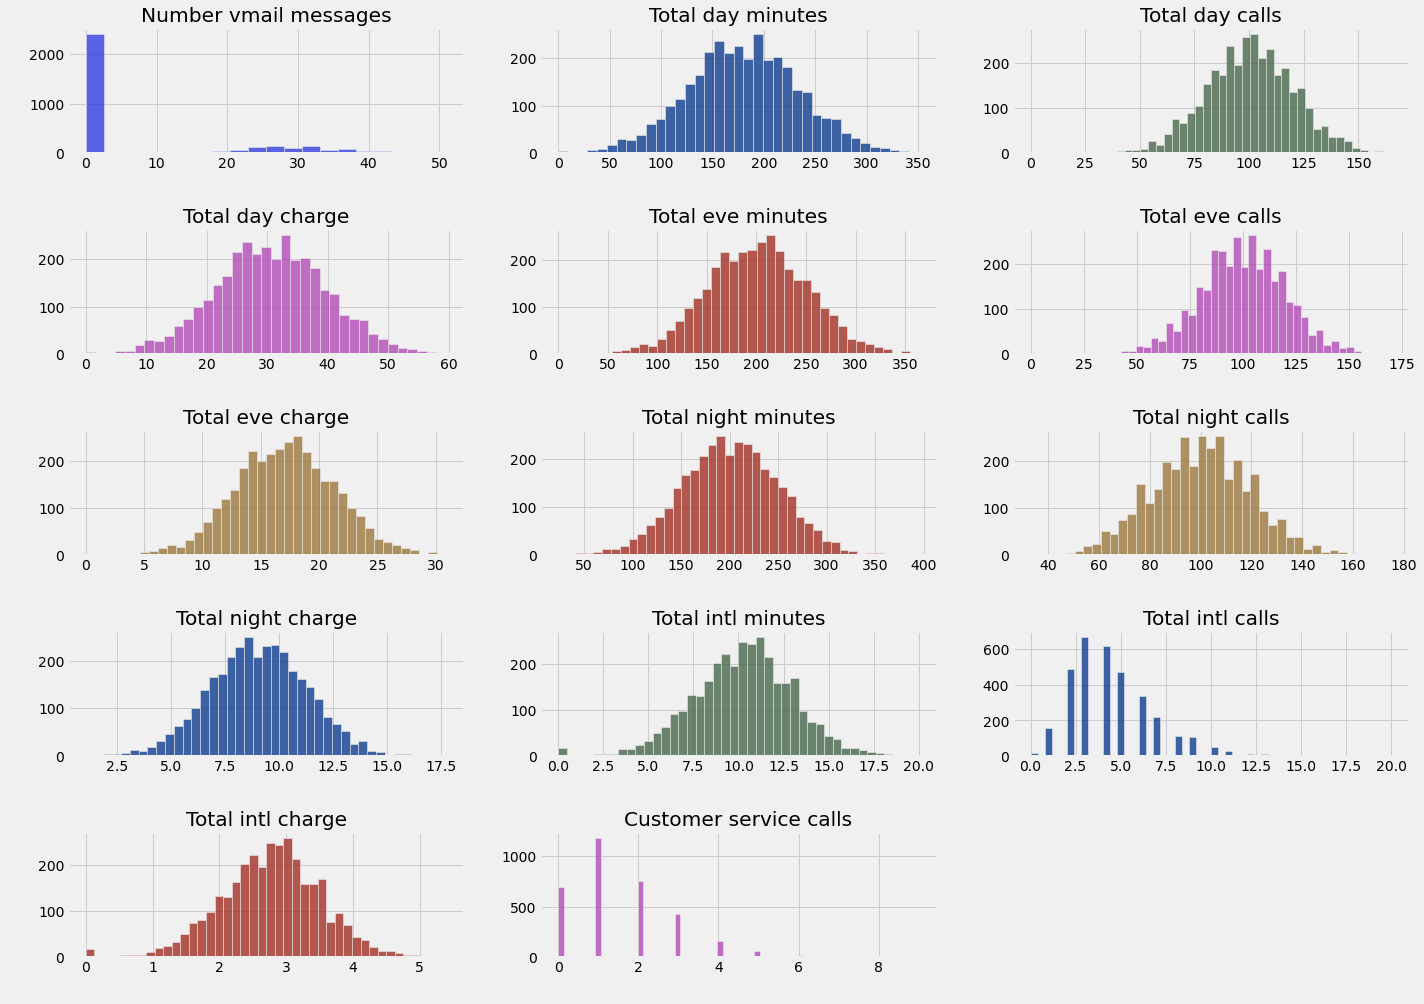

In [ ]:
df = data[['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'
       ]]
print(df.describe())
print("-"*170)

plt.style.use("fivethirtyeight")
plt.figure(figsize= (20,22))
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
for i,col in enumerate(df.columns):
  rand_col = color_[random.sample(range(6), 1)[0]]
  plt.subplot(8,3, i+1)
  sns.histplot(data=df,x=df[col], color = rand_col, fill = rand_col)
  plt.title(col, color = 'black')
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64
--------------------------------------------------


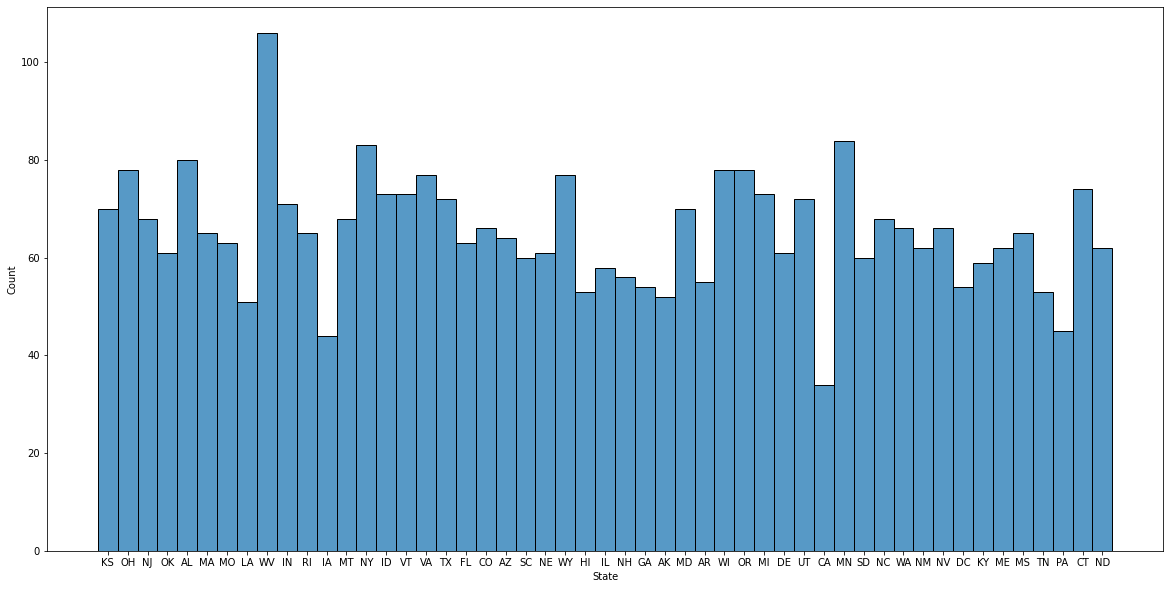

In [ ]:
## lets find out the total customers from each state
print(data['State'].value_counts())
print("-"*50)

plt.figure(figsize=(20,10))
sns.histplot(data = data, x= data['State'], bins = 51,fill=True,element='bars')

In [ ]:
data1 = data['State'][data['Churn']==False]
data2 = data['State'][data['Churn']==True]


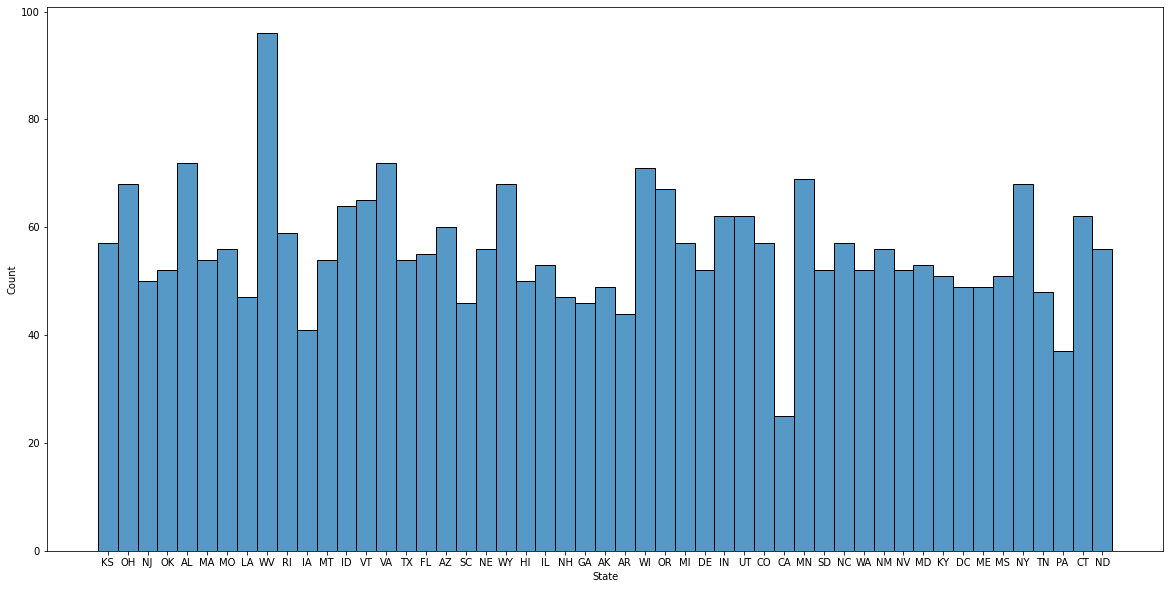

In [ ]:
plt.figure(figsize=(30,10))
sns.histplot(data = data, x= data['State'], hue='Churn', bins = 51,fill=True,element='bars')


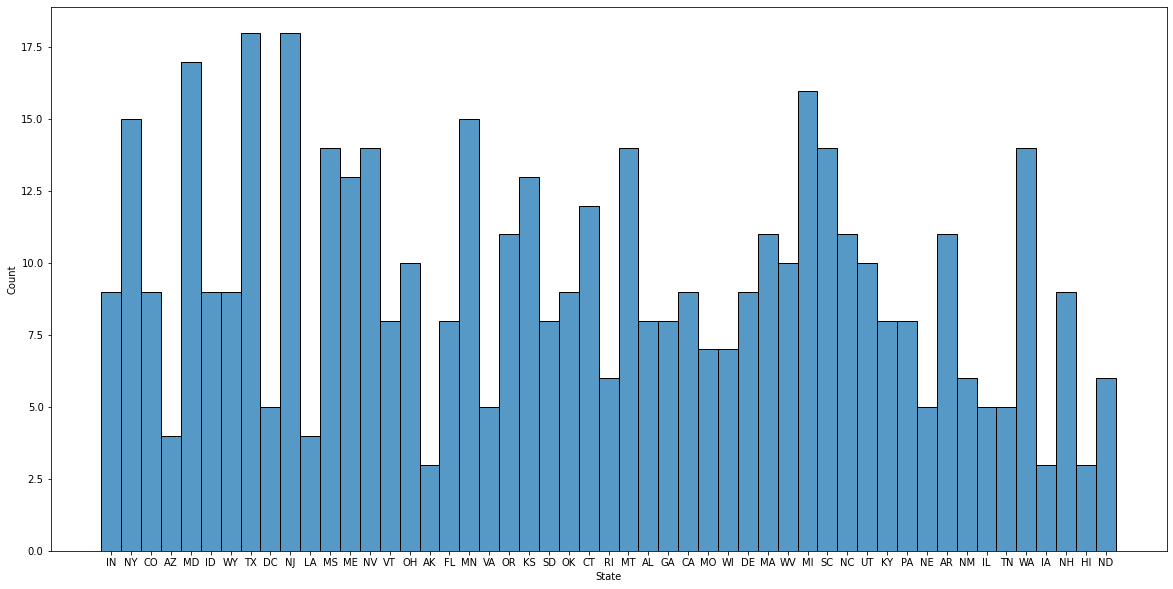

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data = data2, x= data2, bins = 51,fill=True,element='bars')